# 타이타닉 사망 생존 예측하기

### 데이터 로딩

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터의 구조

- Passenger ID: 승객 ID. 1부터 시작해서 1씩 증가하는 값으로 구성, 사망 생존과 무관.
- Survived : 생존 여부, 0은 사망, 1은 생존
- Pclass : 티켓 등급, 1이면 1등석, 2이면 2등석, 3이면 3등석
- Name : 승객 이름
- Sex : 성별
- Age : 나이(결측치 많음)
- Sibsp : 동승한 형재 자매의 수
- Parch : 동승한 부모 자식의 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실 번호
- Embarked : 탑승한 선착장, C는 Cherbour, Q는 Queenstown, S는 Southhampton

# 전처리
- 이름을 뺄 것. 
- 나이를 포함시킨다면 결측치를 어떻게 채워야 할 지에 대한 근거 필요(개인 신상 정보).


In [3]:
train.info()
# 확인해야 하는 사항 : 각각의 컬럼에 결측치 있는지, 어떤 타입인지
# 넘파이 행렬의 경우 같은 타입밖에 들어갈 수 없음
################## 문제점 파악 #######################
# 1번 ; 891개 row 존재. but age, cabin, embarked 결측치 존재
# 2번 ; object -> 문자열
# --> 결측치 채울 수 있는 경우 채워 넣을 수 있음
# --> 결측치 채울 수 없는 경우 object 살릴 경우 600개 넘는 데이터(; cabin 204개 뿐)를 날려야 함
# 분류 데이터 : 왜곡이 적음(남자/ 여자, 1등급/2등급/3등급 -> 충분히 채워 넣을 수 있음)
# 회귀 데이터 : 왜곡이 심함(나이 -> 10대, 20대, 30대 카테고리로 바꿀 수 있음 )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 결측치 : Age, Cabin, Embarked
- 문자열 : Name, Sex, Ticket, Cabin, Embarked

In [4]:
test.info()
# Fare에 결측치 1개 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 결측치 데이터: Age, Fare, Cabin

# 데이터 분석 및 시각화

In [5]:
import matplotlib.pyplot as plt

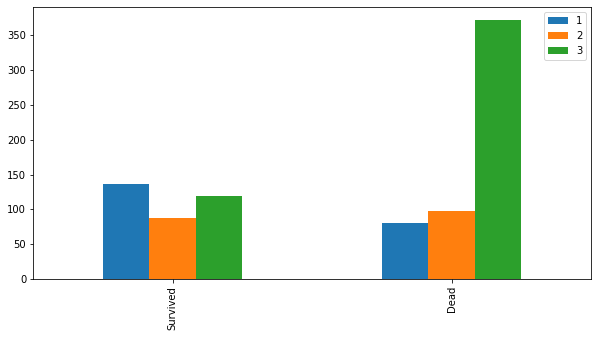

In [6]:
# 생존자 수를 가져온다
survived = train[train['Survived'] ==1]['Pclass'].value_counts()
dead = train[train['Survived'] ==0]['Pclass'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['Survived', 'Dead']
df.plot(kind = 'bar', figsize = (10,5))

In [7]:
# 그래프를 그리는 함수(변수)
def showChart(feature) :
    survived = train[train['Survived'] ==1][feature].value_counts()
    dead = train[train['Survived'] ==0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', figsize = (10,5))
    
    
    

In [8]:
# 결측치, 타입 정보를 출력하는 함수

def showInfo2(feature) : 
    a1 = train[feature].isnull().sum()
    a2 = test[feature].isnull().sum()
    a3 = train[feature].dtype
    print(f'train 결측 : {a1}')
    print(f'test 결측 : {a2}')
    print(f'값 타입 : {a3}')

### Pclass : 티켓 등급

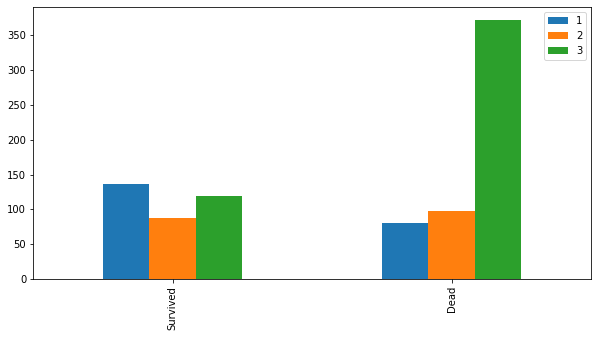

In [9]:
# 그래프 시각화 : 등급끼리 비교하는 것이 아님. Surv와 Dead 비교
showChart('Pclass')

1등석일수록 생존확률 높고 3등석일수록 사망확률 높음

In [10]:
# 결측치 및 데이터의 타입 확인
showInfo2('Pclass')

# a1 = isnull의 값이 true(null)면 1 false(not null)면 0 -> 0(not null)의 합 = 0

train 결측 : 0
test 결측 : 0
값 타입 : int64


결측치가 존재하지 않고 정수타입으로 되어 있으므로 전처리 X

### Name(이름)
사망 및 생존과 관련이 없으므로 분석하지 않는다.

### Sex(성별)


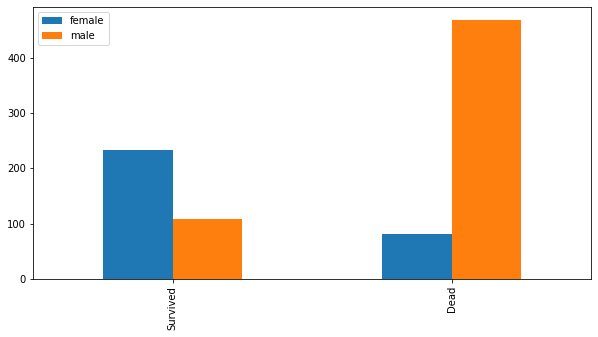

In [11]:
showChart('Sex')

남성은 사망확률이 높고 여성은 생존확률이 높다

In [12]:
### 결측치와 타입 확인

showInfo2('Sex')


train 결측 : 0
test 결측 : 0
값 타입 : object


결측치는 없지만 타입이 문자열 - > 숫자로 바꾸는 작업(전처리) 필요

In [13]:
map1 = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(map1)
test['Sex'] = test['Sex'].map(map1)

# 한번만 사용해야 하며 2번 사용할 경우 Nan처리됨(이미 male, female이 처리되었기 때문에). 

In [14]:
showInfo2('Sex')

train 결측 : 0
test 결측 : 0
값 타입 : int64


값 타입이 int로 바뀌었다

### Age (나이)

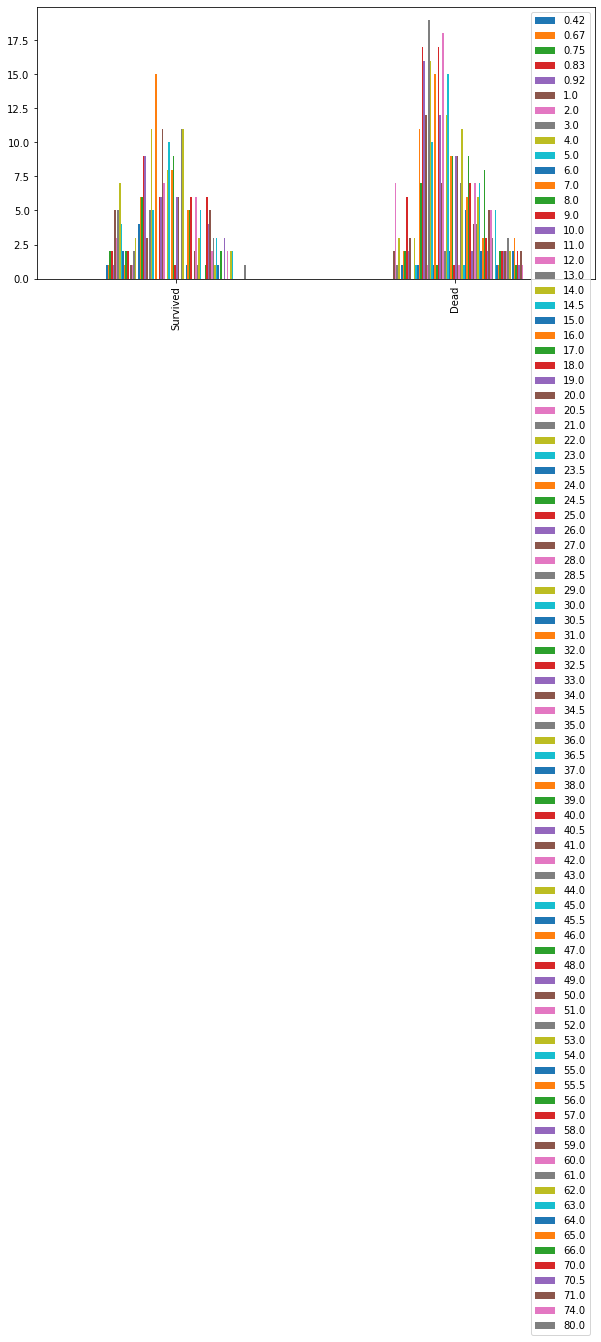

In [15]:
showChart('Age')

나이 데이터가 너무 많아서 시각화하기가 어렵다.
시각화 이전에 전처리부터

In [16]:
showInfo2('Age')


train 결측 : 177
test 결측 : 86
값 타입 : float64


결측치 처리를 위해 이름의 Mr. 네이밍을 토대로 해서 값 추측

In [17]:
### title 을 추출 
# 정규식 이용
# 대괄호는 몇글자가 되도 상관없다는 뜻, A-Z까지, .으로 끝나는 부분 / expand : false = 'series'
train_title = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

test_title = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [18]:
train_title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Countess      1
Jonkheer      1
Don           1
Sir           1
Mme           1
Ms            1
Lady          1
Name: Name, dtype: int64

In [19]:
test_title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Name, dtype: int64

In [20]:
# title을 숫자로 변경
# 띄어쓰기는 글자로 인식함.
map1 = { 
'Mr' : 0,   'Miss': 1,   'Mrs' : 2,       
'Master' : 3,  'Dr': 4,'Rev':  4,
'Col': 4, 'Mlle': 4, 'Major': 4,
'Countess': 4, 'Mme':  4, 'Sir': 4,
'Lady': 4, 'Capt': 4, 'Jonkheer': 4,
'Ms': 4, 'Don': 4, 'Dona' : 4
}

train['Title'] = train_title.map(map1)
test['Title'] = test_title.map(map1)

In [21]:
showInfo2('Title')

train 결측 : 0
test 결측 : 0
값 타입 : int64


In [22]:
# 결측치들만 각 타이틀 별 중간값으로 설정
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)


test['Age'].fillna(test.groupby('Title')['Age'].transform('median'),inplace=True)


In [23]:
showInfo2('Age')

train 결측 : 0
test 결측 : 0
값 타입 : float64


결측치를 각 그룹의 중간값으로 교체한 것(fillna)

In [24]:
# 나이를 구간별로 나눔

# Loc : 인덱스로 데이터 접근이 가능한 함수

train.loc[train['Age'] <= 17, 'Age'] = 0
train.loc[(train['Age'] > 17) & (train['Age'] <= 45), 'Age'] = 1
train.loc[(train['Age'] > 45) & (train['Age'] <= 65), 'Age'] = 2
train.loc[train['Age'] > 65, 'Age' ] = 3
train['Age'].value_counts()

1.0    671
0.0    117
2.0     95
3.0      8
Name: Age, dtype: int64

In [25]:
test.loc[test['Age'] <= 17, 'Age'] = 0
test.loc[(test['Age'] > 17) & (test['Age'] <= 45), 'Age'] = 1
test.loc[(test['Age'] > 45) & (test['Age'] <= 65), 'Age'] = 2
test.loc[test['Age'] > 65, 'Age' ] = 3
test['Age'].value_counts()

1.0    321
2.0     50
0.0     45
3.0      2
Name: Age, dtype: int64

In [26]:
showInfo2('Age')

train 결측 : 0
test 결측 : 0
값 타입 : float64


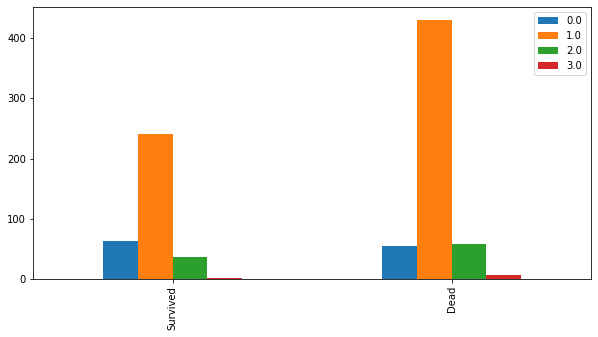

In [27]:
showChart('Age')

아이들은 생존확률이 높지만 그 이후에는 사망확률이 높아진다

### Sibsp, Parch (동승한 형제자매 / 부모자식의 수)

Sibsp, Parch, 본인을 합산해서 '가족수'로 만들어 분석 시도



In [28]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [29]:
showInfo2('FamilySize')

train 결측 : 0
test 결측 : 0
값 타입 : int64


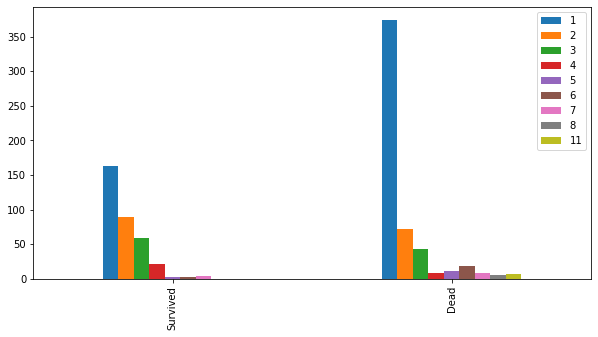

In [30]:
showChart('FamilySize')

혼자 탑승했을 경우 사망 확률이 높다

### Fare (요금)

In [31]:
showInfo2('Fare')

train 결측 : 0
test 결측 : 1
값 타입 : float64


In [32]:
# PClass를 기준으로 그룹화한 뒤 중간값을 세팅한다.
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [33]:
train.loc[train['Fare'] <= 17, 'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 100), 'Fare'] = 2
train.loc[train['Fare'] > 100, 'Fare' ] = 3
train['Fare'].value_counts()

0.0000     496
2.0000     169
1.0000     161
3.0000      53
30.5000      5
31.0000      3
30.0708      2
30.6958      2
Name: Fare, dtype: int64

In [34]:
test.loc[test['Fare'] <= 17, 'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[(test['Fare'] > 31) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[test['Fare'] > 100, 'Fare' ] = 3
test['Fare'].value_counts()

0.0     236
2.0      77
1.0      73
3.0      31
30.5      1
Name: Fare, dtype: int64

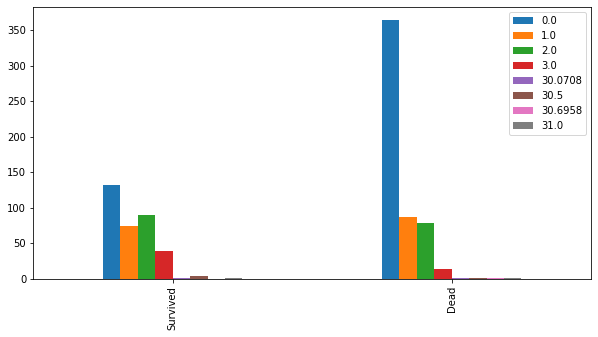

In [35]:
showChart('Fare')

요금이 저렴할 수록 사망확률이 높다

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 97.6+ KB


In [37]:
# 학습에 불필요한 데이터를 날린다
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title']
train = train.drop(drop_list, axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [50]:
# 입력 데이터와 결과 데이터로 나눈다.
x_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

########################## axis 의미

In [39]:
# scaling 작업(정확도 높임)
from sklearn.preprocessing import StandardScaler

s1 = StandardScaler()
s1.fit(x_train)
x_train = s1.transform(x_train)

In [40]:
# k fold 교차 검증 : 주어진 데이터를 랜덤으로 섞어 80% 데이터를 추출
# 그 후 주어진 모델을 학습하고 성능을 평가
# 이러한 행위를 K번 진행하고 평가된 성능을 리스트로 반환.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Fold 생성 : 데이터를 섞어서 가지고 있는 데이터 꾸러미
fold = KFold(n_splits=10, shuffle = True)

model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()

score1 = cross_val_score(model1, x_train, y_train, 
                        cv=fold, scoring='accuracy')
score2 = cross_val_score(model2, x_train, y_train, 
                        cv=fold, scoring='accuracy')
score3 = cross_val_score(model3, x_train, y_train, 
                        cv=fold, scoring='accuracy')
score4 = cross_val_score(model4, x_train, y_train, 
                        cv=fold, scoring='accuracy')

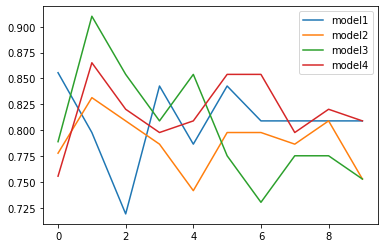

In [42]:
plt.plot(score1, label = 'model1')
plt.plot(score2, label = 'model2')
plt.plot(score3, label = 'model3')
plt.plot(score4, label = 'model4')
plt.legend()

폴드로 인해서 그래프 랜덤으로 나옴
데이터가 왜곡되어 있기 때문에 굴곡이 심함 x 축 의미


### 학습

In [43]:
# 학습한다
model3.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 예측

In [44]:
# 예측결과를 뽑는다.

PassengerId = test['PassengerId']
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Title']

test = test.drop(drop_list, axis=1)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [51]:
x_test = s1.transform(test)
x_test

##############################################수치 의미

array([[ 0.82737724, -0.73769513,  0.01286926, -0.32216018, -0.56097483],
       [ 0.82737724,  1.35557354,  1.9239538 , -0.32216018,  0.05915988],
       [-0.36936484, -0.73769513,  1.9239538 , -0.32216018, -0.56097483],
       ...,
       [ 0.82737724, -0.73769513,  0.01286926, -0.32216018, -0.56097483],
       [ 0.82737724, -0.73769513,  0.01286926, -0.32216018, -0.56097483],
       [ 0.82737724, -0.73769513, -1.89821528, -0.04212562,  0.67929458]])

In [47]:
y_pred = model3.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
result_df = pd.DataFrame({
    'PassengerId' : PassengerId,
    'Survived' : y_pred
    
})
#result_df.head()
result_df.to_csv('result.csv', index = False)

In [49]:
model3.score(x_train, y_train)

0.8484848484848485

### 과정 정리

1. 데이터를 준비
2. 데이터 구조 탐색
3. info()를 통해 해당 데이터 프레임 컬럼, 결측치 등등 파악
4. 그래프를 시각화하여 하나하나 확인(Embark ... 버릴 데이터는 버리고 살릴 데이터 파악)
(. 타이틀 추출하고 숫자로 변환
. 타이틀 별로 그룹으로 묶은 후 그룹별 에이지 중간값으로 결측치를 채워줌
. 요금, 나이)
5. 정확도 위해 scaling
6. 어떤 모델 쓸지 결정. 어려울 경우 'KFOld 교차 검증'시행 : 전체 데이터가 있다면 데이터를 랜덤하게 섞어서 꾸러미를 생성, 각각 학습하고 성능 테스트 -> 평균 예측 수치가 나옴 - > 모델별로 전부 진행
7. 